# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up

random.seed(42)

In [3]:
#load the data
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [4]:
print("the number of rows is {}".format(df.shape[0]))

the number of rows is 294478


**c.** The number of unique users in the dataset.

In [5]:
print("number of unique users in dataset is {}".format(df['user_id'].nunique()))

number of unique users in dataset is 290584


**d.** The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [7]:
len(df[((df['group']=='treatment') != (df['landing_page']=='new_page'))])

3893

**f.** Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### There is no missing values in our dataset.

In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2= df[((df['group']=='treatment') == (df['landing_page']=='new_page'))].copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2['user_id'].duplicated().any()

True

In [13]:
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Remove one of the rows with a duplicate user_id 
df2.drop_duplicates('user_id',inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2['user_id'].duplicated().any()

False

In [16]:
p=df2['converted'].mean()
p

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_group= df2.query('group == "control"')
control_conv=control_group.query("converted== '1'").shape[0]/control_group.shape[0]
control_conv

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_group= df2.query('group == "treatment"')
treatment_conv=treatment_group.query("converted== '1'").shape[0]/control_group.shape[0]
treatment_conv

0.1188375070556328

In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff= (treatment_conv - control_conv)
obs_diff

-0.0015487974448284009

**d.** What is the probability that an individual received the new page?

In [20]:
p_new_page=(df2['landing_page'] == 'new_page').mean()
p_new_page

0.50006194422266881

In [21]:
p_old_page= 1- (df2['landing_page']== 'new_page').mean()
p_old_page

0.49993805577733119

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

### It shows that new group"treatment" did not lead to more conversions.

### The conversion rates is not Decisive so we will need to do more tests.

<a id='ab_test'></a>
## Part II - A/B Test




### The null Hypotheses :  P_new - P_old <= 0
### The alternative Hypotheses : p_new - p_old > 0

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [22]:
p_new=df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [23]:
p_old=df2.converted.mean()
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [24]:
n_new=treatment_group.shape[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old=control_group.shape[0]
n_old

145274

In [26]:
# Simulate a Sample for the treatment Group
new_page_converted=np.random.choice([0,1],size=n_new,p=[p_new,1-p_new],replace=True)
new_page_converted

array([1, 1, 1, ..., 1, 0, 1])

In [27]:
#calcluate the smple mean
new_page_converted.mean()

0.88107494322482971

In [28]:
# Simulate a Sample for the control Group
old_page_converted=np.random.choice([0,1],size=n_old,p=[p_old,1-p_old],replace=True)
old_page_converted

array([1, 1, 1, ..., 0, 1, 1])

In [29]:
#calcluate the smple mean
old_page_converted.mean()

0.88015061194707933

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [30]:
new_page_converted.mean() - old_page_converted.mean()

0.00092433127775037871

In [31]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted=np.random.choice([0,1],size=n_new,p=[p_new,1-p_new],replace=True)
    old_page_converted=np.random.choice([0,1],size=n_old,p=[p_old,1-p_old],replace=True)
    p_diffs.append(new_page_converted.mean()- old_page_converted.mean())


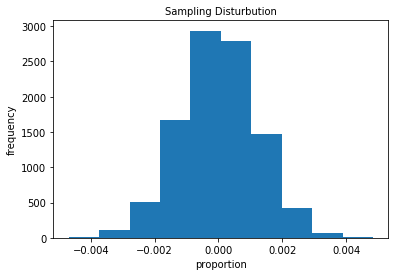

In [32]:
plt.hist(np.array(p_diffs))
plt.title('Sampling Disturbution',fontsize=10);
plt.xlabel('proportion',fontsize=10)
plt.ylabel('frequency',fontsize=10);

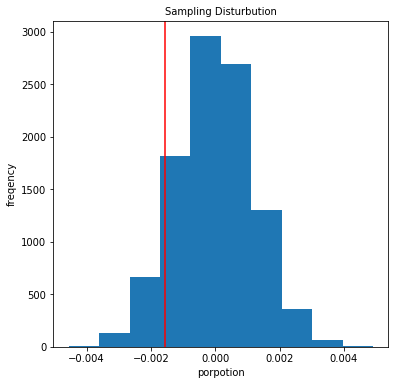

In [33]:
null_vals= np.random.normal(0, np.array(p_diffs).std(), np.array(p_diffs).size)
plt.figure(figsize=(6,6))
plt.hist(null_vals)
plt.axvline(obs_diff, c="red")
plt.title('Sampling Disturbution',fontsize=10);
plt.xlabel('porpotion',fontsize=10)
plt.ylabel('freqency',fontsize=10);

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [34]:
(null_vals > obs_diff).mean()

0.89839999999999998

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

### since the p-value is 0.9 and  larger than (alpha)=0.05 , we can not reject the null hypothesis.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [35]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = control_group.query('converted==1').shape[0]

# number of conversions with the new_page
convert_new = treatment_group.query('converted==1').shape[0]

# number of individuals who were shown the old_page
n_old = df2.query('landing_page=="old_page"').shape[0]

# number of individuals who received new_page
n_new = df2.query('landing_page=="new_page"').shape[0]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [36]:
convert_old,convert_new

(17489, 17264)

In [37]:
n_old, n_new

(145274, 145310)

In [38]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='smaller')
print(z_score, p_value)

1.31092419842 0.905058312759


### The Z-Score: It is the standardization of the normal distribution under the null hypothesis to measure the number of errors in which the estimate falls.

### The findings from the traditional statistical methods agree with the findings of the former methods.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

### The Logistic Regression.

In [39]:
group_dummy=pd.get_dummies(df2['group'])
df2= df2.join(group_dummy)
df2.drop('control', axis= 1, inplace= True)
df2.rename(columns={'treatment': 'ab_page'}, inplace= True)

df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [40]:
df2['intercept']=1
log_model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-02 22:08 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  




###  the p-value of ab_page which is 0.1899 indicates that it is higher than the value of alpha which is 0.05, therefore it is not statistically significant for the conversion rate.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?


### it is a good idea in general,, but adding factors may damage our model if they are irrelevant.

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

In [42]:
# Read the countries.csv
countries=pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [43]:
# Join with the df2 dataframe
new_df=countries.set_index('user_id').join(df2.set_index('user_id'))
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [44]:
# Create the necessary dummy variables
country_dummy=pd.get_dummies(new_df['country'])
new_df=new_df.join(country_dummy)
new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [45]:
new_df['intercept']=1
log_mod=sm.Logit(new_df['converted'],new_df[['intercept','ab_page','UK','US']])
result=log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-02 22:08 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [46]:
# Adding the necessary extra columns
new_df['US_page'] = new_df['US'] * new_df['ab_page']
new_df['UK_page'] = new_df['UK'] * new_df['ab_page']

new_df.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [47]:
# Fit your model, and summarize the results
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'UK', 'US', 'US_page', 'UK_page']])
results = log_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-02 22:08 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

## Conclusions

### The probability value of the page-country interaction for both the US and the UK is greater than 0.05, so we can't reject the null hypothesis.

### Based on all the above tests, we cannot reject the null hypothesis, as there is not enough evidence that the conversion rate of the new page is higher than the conversion rate of the old page.

### But there are many factors to consider when designing an A/B test and drawing conclusions based on its results. here are some common ones to consider:

#### -Novelty effect and change aversion when existing users first experience a change Sufficient traffic and conversions to have significant and repeatable results.
#### -Long enough run time for the experiment to account for changes in behavior based on time of day/week or seasonal events.



